In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
import nltk
from sklearn.feature_extraction.text import CountVectorizer  
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns 

In [2]:
! pip install opendatasets
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/taruntiwarihp/phishing-site-urls")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: emirclk
Your Kaggle Key: ··········


100%|██████████| 9.03M/9.03M [00:00<00:00, 56.7MB/s]

In [6]:
df=pd.read_csv('./phishing-site-urls/phishing_site_urls.csv')

In [7]:
df.shape

(549346, 2)

In [8]:
df

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


<BarContainer object of 2 artists>

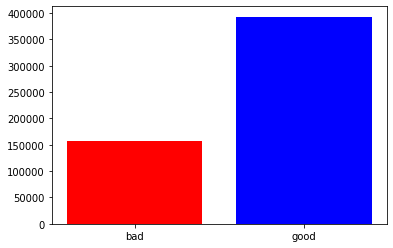

In [9]:
x=df.Label.unique()
y=np.array([df[df['Label']=='bad'].count()[0],df[df['Label']=='good'].count()[0]])
plt.bar(x,y,color=[ 'red', 'blue'])

In [10]:
df[df['Label']=='bad'].count()

URL      156422
Label    156422
dtype: int64

In [11]:
df[df['Label']=='good'].count()

URL      392924
Label    392924
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549346 entries, 0 to 549345
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549346 non-null  object
 1   Label   549346 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [13]:
df.isna().sum()

URL      0
Label    0
dtype: int64

In [14]:
df.URL.duplicated().sum()

42151

In [15]:
df = df.drop_duplicates()

In [16]:
df.describe()

,URL,Label
count,507196,507196
unique,507195,2
top,tommyhumphreys.com/,good
freq,2,392897


In [17]:
df[df['Label']=='bad'].count()

URL      114299
Label    114299
dtype: int64

In [18]:
df[df['Label']=='good'].count()

URL      392897
Label    392897
dtype: int64

In [19]:
df = df.rename(columns={"URL": "url", "Label": "label"})

In [20]:
token = RegexpTokenizer(r'[A-Za-z0-9]+')
token.tokenize(df.url[1])

['www',
 'dghjdgf',
 'com',
 'paypal',
 'co',
 'uk',
 'cycgi',
 'bin',
 'webscrcmd',
 'home',
 'customer',
 'nav',
 '1',
 'loading',
 'php']

In [21]:
df['url_tokenized'] = df.url.map(lambda t: token.tokenize(t))
df.head()

,url,label,url_tokenized
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, 70ffb52d079109dca5664cce6f3173737..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int..."
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi..."


In [22]:
root_words = SnowballStemmer("english")
df['root_words'] = df['url_tokenized'].map(lambda l: [root_words.stem(word) for word in l])

In [23]:
df.sample(5)

,url,label,url_tokenized,root_words
204144,justjaredjr.buzznet.com/tags/doug-brochu/,good,"[justjaredjr, buzznet, com, tags, doug, brochu]","[justjaredjr, buzznet, com, tag, doug, brochu]"
499684,fdlsvuj.info/data/info.php,bad,"[fdlsvuj, info, data, info, php]","[fdlsvuj, info, data, info, php]"
368938,knbr.fantasysportsmatrix.com/,good,"[knbr, fantasysportsmatrix, com]","[knbr, fantasysportsmatrix, com]"
260056,wn.com/B-25_Mitchell,good,"[wn, com, B, 25, Mitchell]","[wn, com, b, 25, mitchel]"
309592,corporationwiki.com/Texas/Houston/abitibi-cons...,good,"[corporationwiki, com, Texas, Houston, abitibi...","[corporationwiki, com, texa, houston, abitibi,..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 507196 entries, 0 to 516470
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   url            507196 non-null  object
 1   label          507196 non-null  object
 2   url_tokenized  507196 non-null  object
 3   root_words     507196 non-null  object
dtypes: object(4)
memory usage: 35.5+ MB


In [25]:
df['vocabs_sent'] = df['root_words'].map(lambda l: ' '.join(l))
df = df.sample(frac=1)
df.head()

,url,label,url_tokenized,root_words,vocabs_sent
154508,ca.linkedin.com/in/mattsbrewer,good,"[ca, linkedin, com, in, mattsbrewer]","[ca, linkedin, com, in, mattsbrew]",ca linkedin com in mattsbrew
43645,toujoursports.com/Paypal_Virefication/5f8a8656...,bad,"[toujoursports, com, Paypal, Virefication, 5f8...","[toujoursport, com, paypal, viref, 5f8a8656967...",toujoursport com paypal viref 5f8a8656967b1215...
409111,oldies.com/product-view/12279N.html,good,"[oldies, com, product, view, 12279N, html]","[oldi, com, product, view, 12279n, html]",oldi com product view 12279n html
197995,homerbookz.info/the-road-to-dune-kevin-j-ander...,good,"[homerbookz, info, the, road, to, dune, kevin,...","[homerbookz, info, the, road, to, dune, kevin,...",homerbookz info the road to dune kevin j ander...
106495,bdt.com.pl/nato/login.php?l=_JeHFUq_VJOXJoGYDw...,bad,"[bdt, com, pl, nato, login, php, l, JeHFUq, VJ...","[bdt, com, pl, nato, login, php, l, jehfuq, vj...",bdt com pl nato login php l jehfuq vjoxjogydw ...


In [26]:
bad_sites = df[df.label == 'bad']
good_sites = df[df.label == 'good']
bad_sites.head()

,url,label,url_tokenized,root_words,vocabs_sent
43645,toujoursports.com/Paypal_Virefication/5f8a8656...,bad,"[toujoursports, com, Paypal, Virefication, 5f8...","[toujoursport, com, paypal, viref, 5f8a8656967...",toujoursport com paypal viref 5f8a8656967b1215...
106495,bdt.com.pl/nato/login.php?l=_JeHFUq_VJOXJoGYDw...,bad,"[bdt, com, pl, nato, login, php, l, JeHFUq, VJ...","[bdt, com, pl, nato, login, php, l, jehfuq, vj...",bdt com pl nato login php l jehfuq vjoxjogydw ...
506339,allaboutseniors.in/wtm1i0yg,bad,"[allaboutseniors, in, wtm1i0yg]","[allaboutsenior, in, wtm1i0yg]",allaboutsenior in wtm1i0yg
24240,www.proves-apllys.tk/login.asp?ref=us.battle.n...,bad,"[www, proves, apllys, tk, login, asp, ref, us,...","[www, prove, aplli, tk, login, asp, ref, us, b...",www prove aplli tk login asp ref us battl net ...
44182,khodacss.gheberg.eu/account/bin-cbg/index1.php,bad,"[khodacss, gheberg, eu, account, bin, cbg, ind...","[khodacss, gheberg, eu, account, bin, cbg, ind...",khodacss gheberg eu account bin cbg index1 php


In [27]:
good_sites.head()

,url,label,url_tokenized,root_words,vocabs_sent
154508,ca.linkedin.com/in/mattsbrewer,good,"[ca, linkedin, com, in, mattsbrewer]","[ca, linkedin, com, in, mattsbrew]",ca linkedin com in mattsbrew
409111,oldies.com/product-view/12279N.html,good,"[oldies, com, product, view, 12279N, html]","[oldi, com, product, view, 12279n, html]",oldi com product view 12279n html
197995,homerbookz.info/the-road-to-dune-kevin-j-ander...,good,"[homerbookz, info, the, road, to, dune, kevin,...","[homerbookz, info, the, road, to, dune, kevin,...",homerbookz info the road to dune kevin j ander...
170685,en.wikipedia.org/wiki/2011%E2%80%9312_Colorado...,good,"[en, wikipedia, org, wiki, 2011, E2, 80, 9312,...","[en, wikipedia, org, wiki, 2011, e2, 80, 9312,...",en wikipedia org wiki 2011 e2 80 9312 colorado...
399665,myspace.com/johnritter_fansite,good,"[myspace, com, johnritter, fansite]","[myspac, com, johnritt, fansit]",myspac com johnritt fansit


In [28]:
c = CountVectorizer()
cv = c.fit_transform(df.vocabs_sent)

In [29]:
print(list(c.vocabulary_)[:10])

['ca', 'linkedin', 'com', 'in', 'mattsbrew', 'toujoursport', 'paypal', 'viref', '5f8a8656967b12159e07929afa679b36', 'new1']


In [30]:
print('The length of vocabulary', len(c.get_feature_names()))
print('The shape is', cv.shape)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


The length of vocabulary 468010
The shape is (507196, 468010)


In [31]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(cv, df.label,test_size=0.25, random_state=5)

**Logistic Regression**

In [161]:
lr = LogisticRegression(max_iter=507195)
lr.fit(Xtrain,Ytrain)
print(lr)

LogisticRegression(max_iter=507195)


In [162]:
lr.score(Xtest,Ytest)

0.9652757513860519

Testing Accuracy : 0.9652757513860519
Training Accuracy : 0.9793321188127141

CONFUSION MATRIX


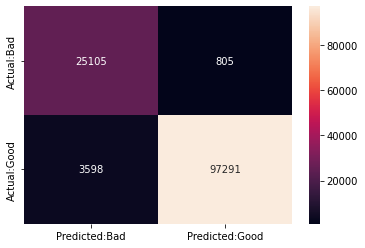

In [163]:
print('Testing Accuracy :',lr.score(Xtest,Ytest))
print('Training Accuracy :',lr.score(Xtrain,Ytrain))

con_mat = pd.DataFrame(confusion_matrix(lr.predict(Xtest), Ytest),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d')

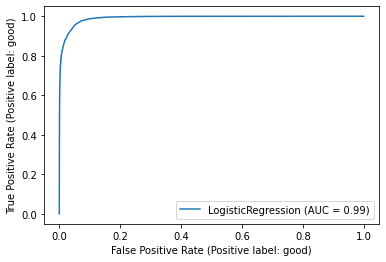

In [166]:
metrics.plot_roc_curve(lr, Xtest, Ytest)
plt.show()

**Naive Bayes**

In [167]:
mnb = MultinomialNB()

In [168]:
mnb.fit(Xtrain,Ytrain)

MultinomialNB()

In [169]:
mnb.score(Xtest,Ytest)

0.9614034811000087

Testing Accuracy : 0.9614034811000087
Training Accuracy : 0.9802548390234413

CONFUSION MATRIX


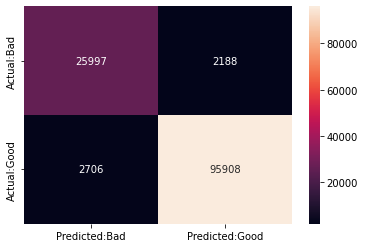

In [170]:
print('Testing Accuracy :',mnb.score(Xtest,Ytest))
print('Training Accuracy :',mnb.score(Xtrain,Ytrain))

con_mat = pd.DataFrame(confusion_matrix(mnb.predict(Xtest), Ytest),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


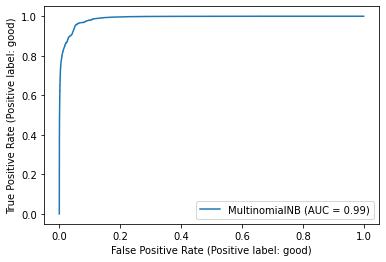

In [171]:
metrics.plot_roc_curve(mnb, Xtest, Ytest)
plt.show()

**SVM**

In [173]:
svc = LinearSVC().fit(Xtrain, Ytrain)
svc.score(Xtest,Ytest)

/usr/local/lib/python3.8/dist-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9721370042350491

Testing Accuracy : 0.9721370042350491
Training Accuracy : 0.9995741291335105

CONFUSION MATRIX


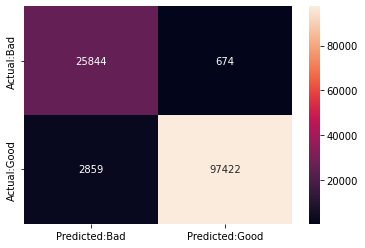

In [174]:
print('Testing Accuracy :',svc.score(Xtest,Ytest))
print('Training Accuracy :',svc.score(Xtrain,Ytrain))

con_mat = pd.DataFrame(confusion_matrix(svc.predict(Xtest), Ytest),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d')

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


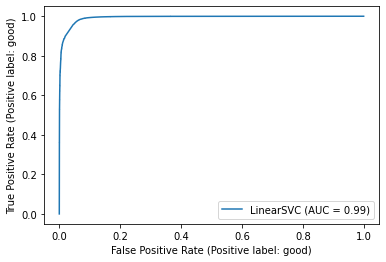

In [175]:
metrics.plot_roc_curve(svc, Xtest, Ytest)
plt.show()

**KNN**

In [176]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(Xtrain, Ytrain)
print(knn)

KNeighborsClassifier(n_neighbors=2)


Testing Accuracy : 0.9277044771646464
Training Accuracy : 0.977208022145285

CONFUSION MATRIX


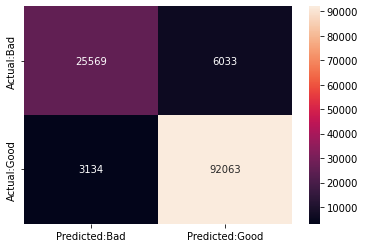

In [177]:
print('Testing Accuracy :',knn.score(Xtest,Ytest))
print('Training Accuracy :',knn.score(Xtrain,Ytrain))

con_mat = pd.DataFrame(confusion_matrix(knn.predict(Xtest), Ytest),
            columns = ['Predicted:Bad', 'Predicted:Good'],
            index = ['Actual:Bad', 'Actual:Good'])
print('\nCONFUSION MATRIX')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d') 

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


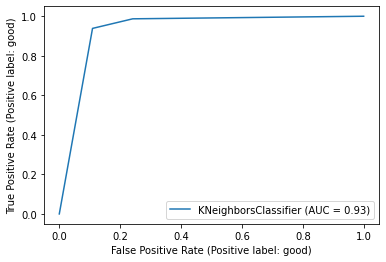

In [178]:
metrics.plot_roc_curve(knn, Xtest, Ytest)
plt.show() 